In [1]:
using Pkg
Pkg.activate("./")
using LaTeXStrings
using CairoMakie
CairoMakie.activate!()

  Activating project at `~/development/TimestepperTestCases.jl`


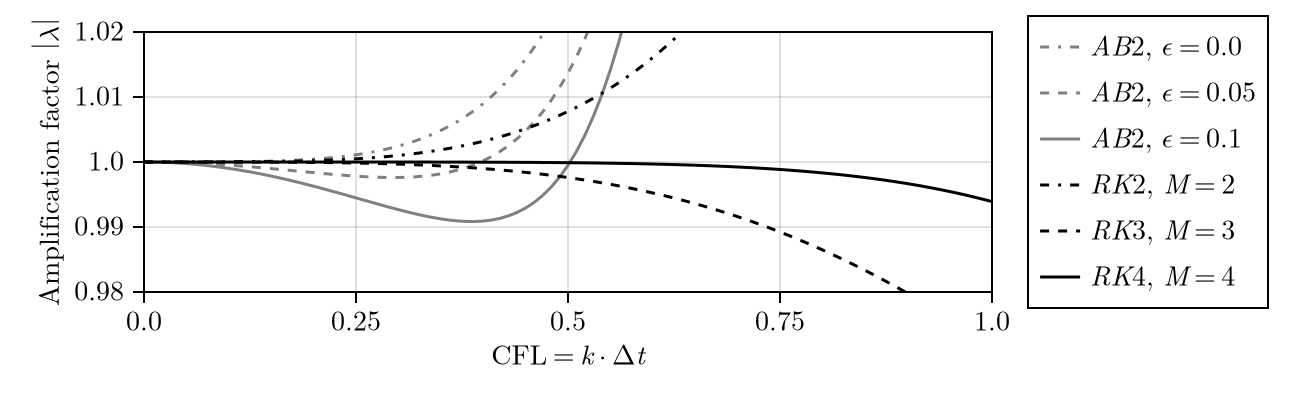

CairoMakie.Screen{IMAGE}


In [3]:
qab2(k, Δt, e) = abs((1 - (1.5 + e) * im * k * Δt + sqrt(1 - (1 - 2e) * im * k * Δt - (3/2+e)^2 * (k * Δt)^2)) / 2)
e(k, Δt) = abs(1 - im * k * Δt)
h(k, Δt) = abs(1 - im * k * Δt + (im * k * Δt)^2 / 2)
f(k, Δt) = abs(1 - im * k * Δt + (im * k * Δt)^2 / 2 - (im * k * Δt)^3 / 6)
g(k, Δt) = abs(1 - im * k * Δt + (im * k * Δt)^2 / 2 - (im * k * Δt)^3 / 6 + (im * k * Δt)^4 / 24)

fig = Figure(size = (650, 200))
ax = Axis(fig[1:2, 1:2], 
          ylabel = L"\text{Amplification factor } \left| \lambda \right|", 
          xlabel = L"\text{CFL} = k\cdot \Delta t", 
          xticks = ([0, 0.25, 0.5, 0.75, 1], latexstring.(string.([0, 0.25, 0.5, 0.75, 1]))), 
          yticks = ([0.98, 0.99, 1.0, 1.01, 1.02], latexstring.(string.([0.98, 0.99, 1.00, 1.01, 1.02]))))

C = 0:0.01:3

lines!(C, qab2.(1, C, 0.00), color = :grey,  linestyle = :dashdot, label = L"AB2, \ \epsilon = 0.0")
lines!(C, qab2.(1, C, 0.05), color = :grey,  linestyle = :dash,    label = L"AB2, \ \epsilon = 0.05")
lines!(C, qab2.(1, C, 0.1),  color = :grey,  linestyle = :solid,   label = L"AB2, \ \epsilon = 0.1")
lines!(C, h.(1, C),          color = :black, linestyle = :dashdot, label = L"RK2, \ M = 2")
lines!(C, f.(1, C),          color = :black, linestyle = :dash,    label = L"RK3, \ M = 3")
lines!(C, g.(1, C),          color = :black, linestyle = :solid,   label = L"RK4, \ M = 4")

ylims!(ax, 0.98, 1.02)
xlims!(ax, 0, 1)

Legend(fig[1:2, 3], ax)

path = "/Users/simonesilvestri/Dropbox (MIT)/Apps/Overleaf/timestepper/"

CairoMakie.save(path * "amplification_factor.pdf", fig)
display(fig)